# Hawaii Climate Analysis
## SQLAlchemy Assignment
#### January 20th-31st 2017

In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:

measurement = engine.execute("select * from measurement limit(2)")

for measure in measurement:
    print(measure)

stations = engine.execute("select * from station limit(2)")

for station in stations:
    print(station)

inspector = inspect(engine)

measurecolumns = inspector.get_columns('Measurement')
for column in measurecolumns:
    print (column["name"])
stationcolumns = inspector.get_columns('Station') 
for column in stationcolumns:
    print (column["name"])



(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
id
station
date
prcp
tobs
id
station
name
latitude
longitude
elevation


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

prcptwelvemonths = engine.execute("select prcp, date from measurement limit 12")

for row in prcptwelvemonths:
    print(row)

(0.08, '2010-01-01')
(0.0, '2010-01-02')
(0.0, '2010-01-03')
(0.0, '2010-01-04')
(None, '2010-01-06')
(0.06, '2010-01-07')
(0.0, '2010-01-08')
(0.0, '2010-01-09')
(0.0, '2010-01-10')
(0.01, '2010-01-11')
(0.0, '2010-01-12')
(0.0, '2010-01-14')


In [14]:
# Calculate the date 1 year ago from today
timeframe=dt.date(2017,8,23) - dt.timedelta(days=365)
timeframe

tobs = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date>=timeframe).all()

# for prcp in prcptimeframe:
#     print(prcp)
# precip = []

# for tobs in prcptimeframe:
#     precip_dict = {}
#     precip_dict["date"] = tobs[1]
#     precip_dict["tobs"]=tobs[0]
#     precip.append(precip_dict)

# print(precip)

In [15]:
# Perform a query to retrieve the data and precipitation scores
prcptimeframe = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>=timeframe).all()

for record in prcptimeframe:
    print (record)
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcptimeframe, columns=["Precipitation", "Date"])

prcp_df.set_index("Date", inplace=True)
prcp_df.head(10)

(0.0, '2016-08-23')
(0.08, '2016-08-24')
(0.08, '2016-08-25')
(0.0, '2016-08-26')
(0.0, '2016-08-27')
(0.01, '2016-08-28')
(0.0, '2016-08-29')
(0.0, '2016-08-30')
(0.13, '2016-08-31')
(0.0, '2016-09-01')
(0.0, '2016-09-02')
(0.0, '2016-09-03')
(0.03, '2016-09-04')
(None, '2016-09-05')
(None, '2016-09-06')
(0.05, '2016-09-07')
(0.0, '2016-09-08')
(0.03, '2016-09-09')
(0.0, '2016-09-10')
(0.05, '2016-09-11')
(0.0, '2016-09-12')
(0.02, '2016-09-13')
(1.32, '2016-09-14')
(0.42, '2016-09-15')
(0.06, '2016-09-16')
(0.05, '2016-09-17')
(0.0, '2016-09-18')
(0.0, '2016-09-19')
(0.0, '2016-09-20')
(0.0, '2016-09-21')
(0.02, '2016-09-22')
(0.0, '2016-09-23')
(0.0, '2016-09-24')
(0.0, '2016-09-25')
(0.06, '2016-09-26')
(0.02, '2016-09-27')
(0.0, '2016-09-28')
(0.0, '2016-09-29')
(0.0, '2016-09-30')
(0.0, '2016-10-01')
(0.0, '2016-10-02')
(0.0, '2016-10-03')
(0.0, '2016-10-04')
(0.0, '2016-10-05')
(0.0, '2016-10-06')
(0.0, '2016-10-07')
(0.0, '2016-10-08')
(0.0, '2016-10-09')
(0.0, '2016-10-10')
(0

(0.92, '2016-12-14')
(0.14, '2016-12-15')
(0.03, '2016-12-16')
(0.07, '2016-12-17')
(0.16, '2016-12-18')
(0.03, '2016-12-19')
(0.0, '2016-12-20')
(0.11, '2016-12-21')
(0.86, '2016-12-22')
(0.24, '2016-12-23')
(0.2, '2016-12-24')
(0.02, '2016-12-25')
(0.22, '2016-12-26')
(0.05, '2016-12-27')
(0.09, '2016-12-28')
(0.52, '2016-12-29')
(0.29, '2016-12-30')
(0.25, '2016-12-31')
(0.03, '2017-01-01')
(0.01, '2017-01-02')
(0.0, '2017-01-03')
(0.0, '2017-01-04')
(0.06, '2017-01-05')
(0.1, '2017-01-06')
(0.0, '2017-01-07')
(0.0, '2017-01-08')
(0.0, '2017-01-09')
(0.0, '2017-01-10')
(0.0, '2017-01-11')
(0.0, '2017-01-12')
(0.0, '2017-01-13')
(0.01, '2017-01-14')
(0.0, '2017-01-15')
(0.0, '2017-01-16')
(0.0, '2017-01-17')
(0.0, '2017-01-18')
(0.02, '2017-01-19')
(0.0, '2017-01-20')
(0.03, '2017-01-21')
(0.09, '2017-01-22')
(0.01, '2017-01-23')
(0.13, '2017-01-24')
(0.79, '2017-01-25')
(0.0, '2017-01-26')
(0.03, '2017-01-27')
(0.0, '2017-01-28')
(0.26, '2017-01-29')
(0.0, '2017-01-30')
(0.0, '2017-

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [16]:
# Sort the dataframe by date
prcp_df.sort_values("Date")

prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


<IPython.core.display.Javascript object>


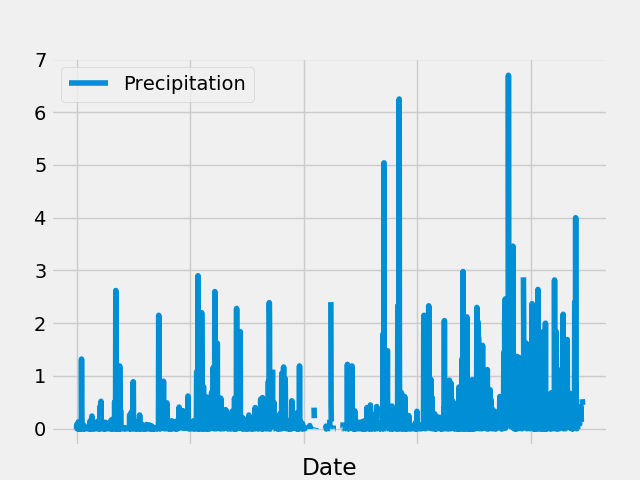

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot()

# Rotate the xticks for the dates
#x_label = prcp_df["Date"]


In [54]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [55]:
# How many stations are available in this dataset?
stationcount= session.query(func.count(Station.station)).all()

stationcount

[(9)]

In [56]:
# What are the most active stations?
# List the stations and the counts in descending order.
#activestations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activestations = session.execute("select station, count(station) from Measurement group by station order by count(station) desc")
for station in activestations:
    print(station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [57]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
tempstats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station =="USC00519281")

for record in tempstats:
    print(record)


(54.0, 85.0, 71.66378066378067)


In [58]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [59]:
timeframe=dt.date(2017,8,23) - dt.timedelta(days=365)
timeframe

# tobs = session.query(Measurement.tobs).group_by(Measurement.tobs).filter(Measurement.station =="USC00519281",Measurement.date>=timeframe).all()
tobs = session.query(Measurement.tobs).filter(Measurement.station =="USC00519281", Measurement.date>=timeframe).all()

# for record in tobs:
#     print(record)
    
tobs_df = pd.DataFrame(tobs, columns=["Temperature"])

# tobs_df.set_index("Temperature",inplace=True)

tobs_df.head()


,Temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<IPython.core.display.Javascript object>


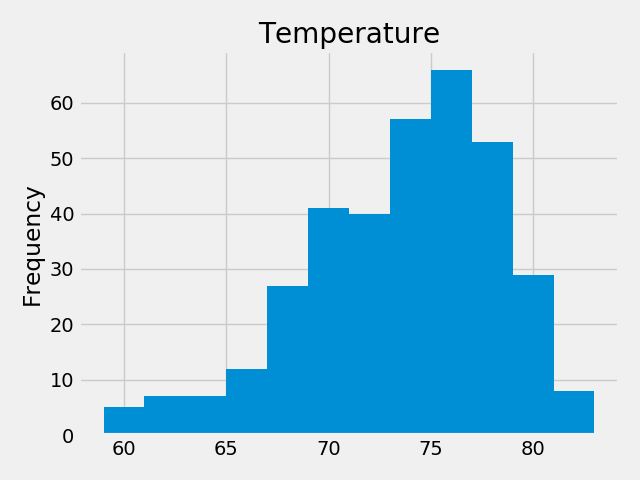

In [60]:
tobs_df.hist(bins=12)
#lt.legend("Temp")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [100]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# Start date January 20th. end date:January 31st 2017

from datetime import time

In [61]:
def calc_temps(start_date, end_date):
    start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-01-20', '2017-01-31'))

[(63.0, 70.04347826086956, 77.0)]


In [62]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
prev_year = calc_temps('2016-01-20','2016-01-31')

prev_year_list = list(np.ravel(prev_year))

print(prev_year_list)

[64.0, 70.07575757575758, 78.0]


<IPython.core.display.Javascript object>


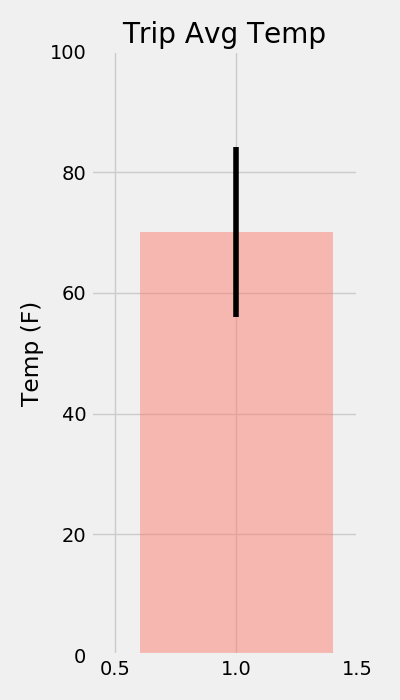

In [63]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


error= (prev_year_list[2]-prev_year_list[0])
plt.figure(figsize=(4,7))
plt.bar(x=1, height = prev_year_list[1], yerr = error, color = "salmon", alpha=0.5, align='center')
plt.xlim(0.4,1.5)
plt.ylim(0,100)
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.tight_layout()
plt.show()

In [159]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Start date January 20th. end date:January 31st 2017
start_date = '2016-01-20'
end_date = '2016-01-31'
rainfall = session.query(Measurement.station, Station.name,func.sum(Measurement.tobs),Station.latitude,Station.longitude,Station.elevation).order_by(func.sum(Measurement.tobs).desc()).group_by(Station.station).filter(Measurement.station == Station.station).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

rainfall_desc=[]

for record in rainfall:
    rainfall_desc.append(record)
    
print(rainfall)

[('USC00513117', 'KANEOHE 838.1, HI US', 847.0, 21.4234, -157.8015, 14.6), ('USC00519281', 'WAIHEE 837.5, HI US', 827.0, 21.45167, -157.84888999999998, 32.9), ('USC00519397', 'WAIKIKI 717.2, HI US', 822.0, 21.2716, -157.8168, 3.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 817.0, 21.5213, -157.8374, 7.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 751.0, 21.3331, -157.8025, 152.4), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 619.0, 21.33556, -157.71139, 19.5), ('USC00517948', 'PEARL CITY, HI US', 418.0, 21.3934, -157.9751, 11.9)]


In [73]:
start_date=dt.date(2017,8,23) - dt.timedelta(days=365)

start_stats = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).filter(Measurement.date>=start_date).all()

print(start_stats)
for record in start_stats:
    print(record)
# start_stats_list = list(np.ravel(start_stats))
                        

[(58.0, 74.59058295964125, 87.0)]
(58.0, 74.59058295964125, 87.0)


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


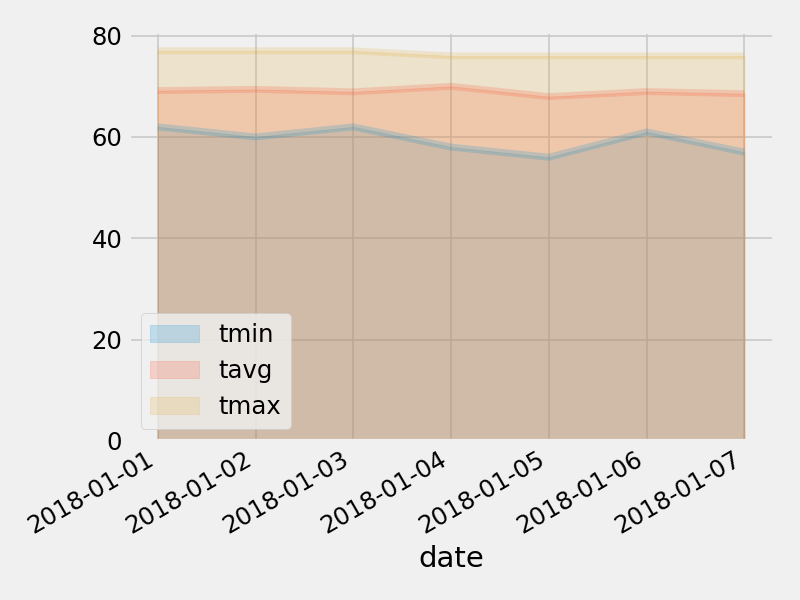

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
